In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
from sklearn.metrics import mean_squared_error

In [3]:
sbi_train = pd.read_csv("Train_SBI.csv")
sbi_train.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,19-Jun-23,EQ,571.25,572.75,565.90,571.25,569.20,568.85,568.29,629.55,430.7,"1,79,03,691","10,17,44,91,934.45","2,13,062"
1,20-Jun-23,EQ,568.85,569.45,562.55,568.85,568.00,567.40,565.75,629.55,430.7,"1,45,49,152","8,23,11,66,324.45","2,16,416"
2,21-Jun-23,EQ,567.40,569.50,565.65,567.40,566.30,566.35,567.46,629.55,430.7,"1,49,46,871","8,48,17,84,144.45","2,19,147"
3,22-Jun-23,EQ,566.35,569.00,561.05,566.35,562.90,562.95,564.62,629.55,430.7,"1,49,79,063","8,45,74,57,302.25","1,99,200"
4,23-Jun-23,EQ,562.00,562.10,553.80,562.95,555.45,554.60,556.89,629.55,430.7,"1,22,15,712","6,80,28,03,838.55","2,18,058"


In [4]:
training_set = sbi_train.iloc[:,2:3].values
training_set

array([[571.25],
       [568.85],
       [567.4 ],
       [566.35],
       [562.  ],
       [556.  ],
       [558.25],
       [572.25],
       [574.  ],
       [574.5 ],
       [588.2 ],
       [589.8 ],
       [590.4 ],
       [590.  ],
       [594.65],
       [595.  ],
       [589.  ],
       [594.9 ],
       [586.75],
       [587.  ],
       [603.05],
       [594.65],
       [601.4 ],
       [610.  ],
       [615.05],
       [621.8 ],
       [612.  ],
       [616.4 ],
       [616.4 ],
       [616.65],
       [620.2 ],
       [609.85],
       [598.7 ],
       [594.8 ],
       [577.  ],
       [571.  ],
       [575.  ],
       [573.75],
       [575.45],
       [572.95],
       [558.8 ],
       [565.75],
       [570.  ],
       [572.95],
       [572.5 ],
       [571.  ],
       [578.15],
       [573.8 ],
       [572.8 ],
       [573.65],
       [576.7 ],
       [569.3 ],
       [562.7 ],
       [572.  ],
       [575.6 ],
       [574.25],
       [568.  ],
       [581.  ],
       [587.  

In [5]:
SC = MinMaxScaler()
training_set_scaled = SC.fit_transform(training_set)
training_set_scaled.shape

(228, 1)

# Creating a datastracture with 30 timestemps and 1 output 

In [6]:
X_train = []
y_train = []
for i in range(30,228):
    X_train.append(training_set_scaled[i-30:i,0])
    y_train.append(training_set_scaled[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [7]:
#Reshaping 
#Turning it from a 2D array (samples, features) into a 3D array (samples, features, 1)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

# Now Initializing RNN

In [8]:
Regressor = Sequential()
#Adding the fisrt LSTM layer and some dropout regularization 
Regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1],1)))
Regressor.add(Dropout(0.2))
#Adding the Second LSTM layer and some dropout regularization 
Regressor.add(LSTM(units=50, return_sequences=True))
Regressor.add(Dropout(0.2))
#Adding the Third LSTM layer and some dropout regularization 
Regressor.add(LSTM(units=50, return_sequences=True))
Regressor.add(Dropout(0.2))
#Adding the Fourth LSTM layer and some dropout regularization 
Regressor.add(LSTM(units=50))
Regressor.add(Dropout(0.2))
#Adding output layer
Regressor.add(Dense(units=1))

Regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [9]:
warnings.filterwarnings("ignore")
Regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Define the EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [11]:
# Fit the model with early stopping
Regressor.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=5, 
    validation_split=0.2,  # Use 20% of the training data for validation
    callbacks=[early_stopping]
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 102ms/step - loss: 0.0463 - val_loss: 0.1369
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0153 - val_loss: 0.0143
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0187 - val_loss: 0.0131
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0179 - val_loss: 0.0087
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0170 - val_loss: 0.0258
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0179 - val_loss: 0.0147
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0155 - val_loss: 0.0114
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0065 - val_loss: 0.0110
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0083 - val_loss: 0.0318
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0077 - val_loss: 0.0110
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0078 - val_loss: 0.0197
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/st

In [12]:
Prediction = Regressor.predict(X_train)
print("RMSE", math.sqrt(mean_squared_error(y_train,Prediction)))

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step
RMSE 0.05348112685250187


# Getting the real price for test set of last 1 month

In [55]:
sbi_test = pd.read_excel("Test_SBI.xlsx")
SBI_Stock_price = sbi_test.iloc[:,2:3].values

In [60]:
SBI_total.shape

(248,)

# Getting the predicted stock price of last month

In [61]:
SBI_total = pd.concat((sbi_train['OPEN '],sbi_test['OPEN ']),axis=0)

inputs = SBI_total[len(SBI_total)-len(sbi_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = SC.transform(inputs)

X_test = []
for i in range(30,50):
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_train)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

SBI_Pridicted_price = Regressor.predict(X_test)
SBI_Pridicted_price = SC.inverse_transform(SBI_Pridicted_price)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


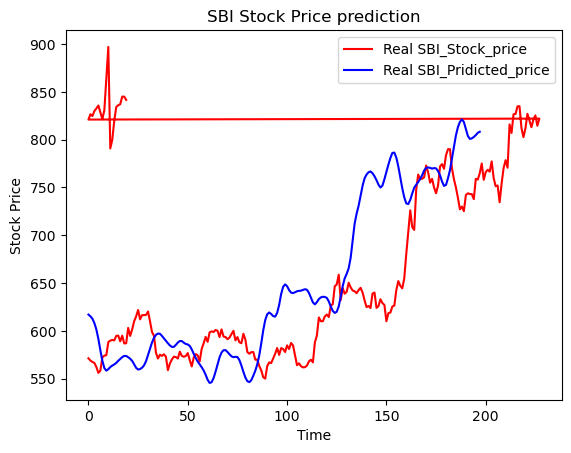

In [54]:
#Visualizing the results 

plt.plot(SBI_total, color = 'red', label = 'Real SBI_Stock_price')
plt.plot(SBI_Pridicted_price, color = 'blue', label = 'Real SBI_Pridicted_price')
plt.title('SBI Stock Price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()